In [14]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb

# 파일불러오기
# 웹스크래핑 불러오기 : 500개 넘버링만 가져오기
(train_data,train_label),(test_data,test_label)=imdb.load_data(num_words=500)
# (25000,) 1차원배열
print(train_data.shape,test_data.shape)



(25000,) (25000,)


In [15]:
## 단어의 수 : 218개 예) 영화 가 너무 재미 없음. 짱 재미 없음. 정말 재미 ... => 번호처리 해줌
## [1, 14, 22, 16, 43, 2, 2, 2, 2, => 2는 500단어에서 없는 것을 의미함, 500번대 이상은 없음
# print(train_data[0])
# print(len(train_data[0])) 

# 0 : 부정, 1 : 긍정
# print(train_label)
print(np.unique(train_label))

[0 1]


In [16]:
# 데이터 전처리
sub_data,val_data,sub_label,val_label=train_test_split(train_data,train_label,random_state=42)

# 
print(sub_data.shape,val_data.shape)

(18750,) (6250,)


In [17]:
# 각 train_data의 문장길이가 어떻게 되는지 확인
# 25000개의 단어길이 합을 구함
lengths=np.array([len(x) for x in train_data])
print(np.mean(lengths),np.median(lengths)) 
print(np.max(lengths)) 
print(np.min(lengths)) 

238.71364 178.0
2494
11


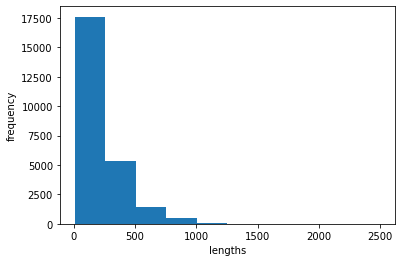

In [18]:

# 그래프 그리기
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [19]:
# 11 ~ 2494 글자 존재 => 100글자만 사용할 것
# 100글자 짜르고, 없는 부분 0으로 채워줌
from tensorflow.keras.preprocessing.sequence import pad_sequences

sub_seq=pad_sequences(sub_data,maxlen=100)
# 문장길이 218 
print(sub_seq[0])
print(len(sub_seq[0])) # 100개
print(sub_seq[5])

# test_data -> val_data
val_seq=pad_sequences(val_data,maxlen=100)


[  2  13 124   4   2  81   2   2 188   4   2   2  18 118   2  18  14  20
 190  13 122  24 169 101   2  11  41 116  12 186  15   8  79   2  25  43
  28   8   2  66   2  11   2   5   2 139   5   2  32  11  32   6  87  20
  48  25  92  40  12 475   2 106  12 174   5  67  48  25  79  12  48  12
   2  25   2  42   2  42   2   2  95 104  48  15  16  24  51   4 167  16
 165   2  33 143  14  20  11   4  86 273]
100
[312 489  10  10   2  47  69   2  11   2  11   2 153  19   2 245   5   2
  31   7  27 171 108  13 161 459  18  21   8  72   2   9 131  27   2   2
 259   2  19  27 303 157  80 220 434 358  14   2 157   5 174  14  22   9
   6   2  33   4 350   7  27   2   2  23 175   2 474   2 194 278   8  30
   2   8  67  14  23   6   2 268 137  15  80 242 115   2  45  52   8 124
  15  33 222  14 356  47  77   2  23 288]


In [20]:
print(val_seq[1])

[ 53   2   8   4 114   4   2   2  26  53   2  74   2 137   4   2  26   2
   5   2  10  10 160 439   9  15   4 445   2   2   9 446   2   2   8   4
   2 444  13 104   6 117  53 278   5 128   2  62  28 224  14   6 176   7
   2  21  50   9 142   2  44  12   2   2  93   6   2   2   7 231 268   2
   7 134 356   2   4  22   2   2  39 112   2  34   4 412 206 108  21  45
 131   6  87  20  18   2   2   7  32   2]


In [21]:
# ####### 원핫인코딩
# train_oh=keras.utils.to_categorical(train_seq)
# print(train_oh[0]) # (18750, 100, 500)

# test_oh=keras.utils.to_categorical(test_seq)
# print(test_oh[0]) # (18750, 100, 500)

In [22]:

# 순환 신경망 선언
model=keras.Sequential()

# 임베딩 벡터 - 가중치가 들어감
# 500단어를 16개로 벡터화
model.add(keras.layers.Embedding(500,16,input_length=100))

# SimpleRNN - 원핫인코딩 해야만 가능
# 순환 신경망 - 뉴런개수:8
# model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))

# # GRU
# model.add(keras.layers.GRU(8))

# LSTM
model.add(keras.layers.LSTM(8,dropout=0.3,return_sequence=True))
model.add(keras.layers.LSTM(8,dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))

print(model.summary())
## embedding 아닐때
# 500*8 + 8*8 (순환이기 때문에 자기자신 곱함) + 8 (y절편) = 4072개
# 8*1 + 1 = 9
## embedding 일때
# 500*16 = 8000
# 16*8 + 8*8 + 8 = 200
# 8*1 + 1 = 9
## LSTM (내부셀1개, 은닉셀4개)
# 500*16 = 8000
# (16*8 + 8*8 + 8 = 200)*4 = 800
# 8*1 + 1 = 9
## GRU
# 500*16 = 8000
# ((16*8 + 8*8 + 8 = 200)+ 8(8개 절편 추가됨))*3 = 624
# 8*1 + 1 = 9

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# 순환신경망 설정 adam, RMSprop
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics='accuracy')


In [24]:
# 콜백 - 20번돌고나서, 가장 낮은 손실률을 저장
check_cb=keras.callbacks.ModelCheckpoint('best-rnn.h5',save_best_only=True)
early_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history=model.fit(sub_seq,sub_label,epochs=100,batch_size=64,\
    validation_data=(val_seq,val_label),callbacks=[check_cb,early_cb])


Epoch 1/100
293/293 [==============================] - 8s 21ms/step - loss: 0.6922 - accuracy: 0.5614 - val_loss: 0.6915 - val_accuracy: 0.5987
Epoch 2/100
293/293 [==============================] - 6s 19ms/step - loss: 0.6901 - accuracy: 0.6166 - val_loss: 0.6885 - val_accuracy: 0.6362
Epoch 3/100
293/293 [==============================] - 6s 19ms/step - loss: 0.6849 - accuracy: 0.6450 - val_loss: 0.6806 - val_accuracy: 0.6555
Epoch 4/100
293/293 [==============================] - 6s 19ms/step - loss: 0.6660 - accuracy: 0.6611 - val_loss: 0.6408 - val_accuracy: 0.6682
Epoch 5/100
293/293 [==============================] - 5s 18ms/step - loss: 0.6043 - accuracy: 0.7183 - val_loss: 0.5891 - val_accuracy: 0.7352
Epoch 6/100
293/293 [==============================] - 5s 18ms/step - loss: 0.5726 - accuracy: 0.7439 - val_loss: 0.5663 - val_accuracy: 0.7451
Epoch 7/100
293/293 [==============================] - 5s 18ms/step - loss: 0.5516 - accuracy: 0.7575 - val_loss: 0.5476 - val_accuracy:

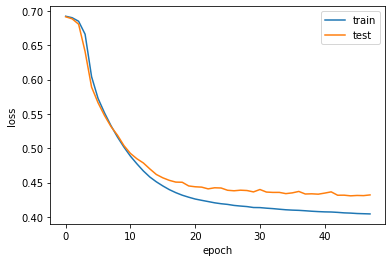

In [25]:
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [26]:
# 정확도
score= model.evaluate(val_seq,val_label)
print('loss, accuracy : ', score)

196/196 [==============================] - 1s 4ms/step - loss: 0.4307 - accuracy: 0.8003
loss, accuracy :  [0.4307381212711334, 0.800320029258728]
